In [105]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20



##3ab(1).Get the data and Explore input features and outputs

In [106]:
#get data and add column names
col_names = ['buyPrice', 'maintCost', 'Doors', 'Persons', 'bootLuggage', 'safety', 'decision']
data = pd.read_csv("./car_evaluation.csv",names = col_names)
#display  data first five rows
data.head()

,buyPrice,maintCost,Doors,Persons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [107]:
#print data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1728 non-null   object
 1   maintCost    1728 non-null   object
 2   Doors        1728 non-null   object
 3   Persons      1728 non-null   object
 4   bootLuggage  1728 non-null   object
 5   safety       1728 non-null   object
 6   decision     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [108]:
#print attribute values of each column
print("Attribute Values:")
for i in data.columns:
    unique=data[i].unique()
    print(i,":",unique)

Attribute Values:
buyPrice : ['vhigh' 'high' 'med' 'low']
maintCost : ['vhigh' 'high' 'med' 'low']
Doors : ['2' '3' '4' '5more']
Persons : ['2' '4' 'more']
bootLuggage : ['small' 'med' 'big']
safety : ['low' 'med' 'high']
decision : ['unacc' 'acc' 'vgood' 'good']


### All input features are categorical values.Hence Encoding is to be done to concert them into Numerical values

##3ab(2).Preprocessing:Encoding of Categorical features to Numerical values

In [109]:
#Encode Categorical features to Numerical values
Encoder1 = LabelEncoder()
data['maintCost'] = Encoder1.fit_transform(data['maintCost'])
data['buyPrice']= Encoder1.fit_transform(data['buyPrice'])
data['bootLuggage']= Encoder1.fit_transform(data['bootLuggage'])
data['safety']=Encoder1.fit_transform(data['safety'])
data['Doors']= Encoder1.fit_transform(data['Doors'])
data['Persons']=Encoder1.fit_transform(data['Persons'])
data.head()

,buyPrice,maintCost,Doors,Persons,bootLuggage,safety,decision
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc


In [110]:
#Describe Encoded data
data.describe()

,buyPrice,maintCost,Doors,Persons,bootLuggage,safety
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


### The  car Evaluation dataset has six features and four output classes.All six categorical features are encoded to numerical values

##3ab(3).Split dataset to test,train and validation sets

   split 1728 samples into 1000 training,400 testing and 328 validation samples with shuffling

In [111]:
# we want training size=1000 and test and validation size =728 
#  define train_size=0.578 (that is 57.9% of remaining data)
train_size=0.579
X = data.drop(columns = ['decision']).copy()
y = data['decision']
# split the data into training and remaining dataset,with shuffling
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.579,random_state=4,shuffle=True,stratify=y)
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_remaining shape: ",X_rem.shape)
print("y_remaining shape: ",y_rem.shape)



X_train shape:  (1000, 6)
y_train shape:  (1000,)
X_remaining shape:  (728, 6)
y_remaining shape:  (728,)


In [112]:
# we want the validation size=300 and test size =428 
#  define test_size=0.587 (that is 58.7% of remaining data)
test_size = 0.587
#split the remaining data into validation and test dataset,with shuffling
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.587,random_state=4,shuffle=True,stratify=y_rem)
print("X_valid shape: ",X_valid.shape)
print("X_test shape: ",X_test.shape)
print("y_valid shape: ",y_valid.shape)
print("y_test shape: ",y_test.shape)

X_valid shape:  (300, 6)
X_test shape:  (428, 6)
y_valid shape:  (300,)
y_test shape:  (428,)


###The dataset is split into training,testing and validation sets

##3C(1).Build KNN classifier Model


In [113]:
#Model for KNN classifier with uniform weights and with auto selected algorithmn
clf = KNeighborsClassifier(n_neighbors=2)
#fir classifier on training data
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

##3C(2).Predict test data outputs and accuracy


In [114]:
#predict outputs for testing data
pred1=clf.predict(X_test)
#print prediction accuracy for testing data
accuracy_test = accuracy_score(y_test, pred1)*100
print(" Prediction Accuracy:",accuracy_test)

 Prediction Accuracy: 75.70093457943925


##3C(3).Predict validation data outputs and accuracy 


In [115]:
#predict outputs for validation data
pred2=clf.predict(X_valid)
#print prediction accuracy for validation data
accuracy_valid=accuracy_score(y_valid,pred2)*100
print("Validation Prediction accuracy:",accuracy_valid)

Validation Prediction accuracy: 72.0


##3C(4).Build 10 separate KNN classifiers and get accuracy score on test and validation sets

In [116]:
#Ten different KNN classifiers for 10% increments of training data
#arr to hold validation accuracies
accuracy_valid=[]
#arr to hold testing acuracies
accuracy_test=[]
trainingsize=0.10
for i in range(10):
  X_train_new, X_rem_new, y_train_new, y_rem_new = train_test_split(X_train,y_train, train_size=trainingsize)
  # KNN classifier model
  clf1 = KNeighborsClassifier(n_neighbors=2)
  clf1.fit(X_train_new, y_train_new)
  pred_valid=clf1.predict(X_valid)
  pred_test=clf1.predict(X_test)
  accuracy_valid.append(round((accuracy_score(y_valid,pred_valid)*100),2))
  accuracy_test.append(round((accuracy_score(y_test,pred_test)*100),2))
  #increase training size
  trainingsize=trainingsize+0.10
 

In [123]:
print("Test accuracies for 10 KNNs:\n")
print(accuracy_test)


Test accuracies for 10 KNNs:

[58.41, 66.59, 72.43, 72.66, 72.66, 75.7, 74.07, 76.87, 75.93, 73.36]


In [118]:
print("Validation accuracies for 10 KNNs:\n")
print(accuracy_valid)

Validation accuracies for 10 KNNs:

[58.0, 61.33, 73.0, 71.33, 69.67, 71.33, 71.0, 73.0, 70.67, 69.0]


##3C(5).plot ten Training sets vs accuracy scores for test and validation sets

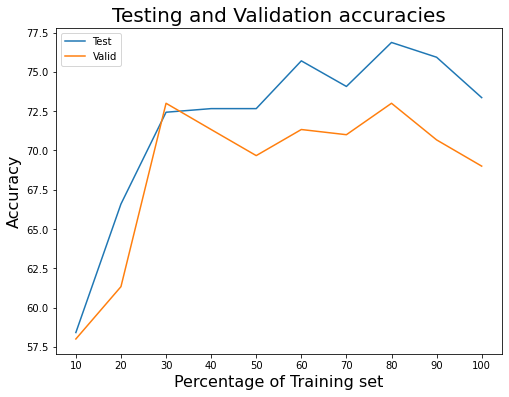

In [124]:
x = [10,20,30,40,50,60,70,80,90,100]
plt.figure(figsize = (8,6))
plt.plot(x, accuracy_test, label="Test")
plt.plot(x,accuracy_valid,label="Valid")
plt.legend(loc="upper left")
plt.xlabel('Percentage of Training set')
plt.ylabel('Accuracy')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.title("Testing and Validation accuracies")
plt.show()

## Comment:
1. The accuracies increased upto 60% of training data.Thereafter slightly decreases and again increased at 80%training data.
2. Testing accuracies in this plot are  higher than validation accuracies.

##3d(1).	Build  KNN classifier with K varying from 1 to 10.



In [120]:
accuracymatrix=[]
k=1
for i in range(10):
  clf2 = KNeighborsClassifier(n_neighbors=k)
  clf2.fit(X_train, y_train)
  pred_valid=clf2.predict(X_valid)
  accuracymatrix.append(round((accuracy_score(y_valid,pred_valid)*100),2))
  k=k+1


##3d(2).	Get Validation accuracies


In [125]:
print("Validation Accuracies for 1 to 10 Ks:\n")
print(accuracymatrix)

Validation Accuracies for 1 to 10 Ks:

[78.0, 72.0, 86.33, 85.0, 88.33, 87.67, 87.0, 85.33, 84.0, 84.0]


##3d(3).	Plot K vs validation accuracies


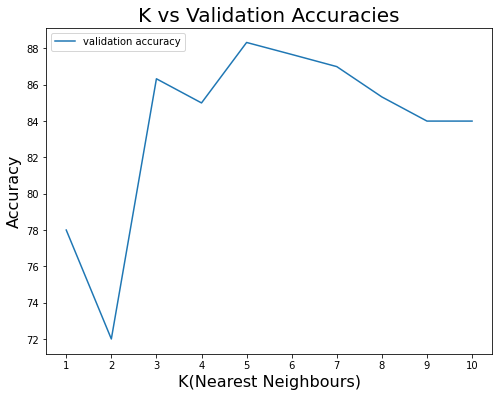

In [127]:
kvalues=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (8,6))
plt.plot(kvalues, accuracymatrix, label="validation accuracy")
plt.xlabel('K(Nearest Neighbours)')
plt.ylabel('Accuracy')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("K vs Validation Accuracies")

plt.legend(loc="upper left")
plt.show()


##Comment:
 1. From the above plot the best nearest neighbours for classification is K=5 which give highest accuracy=88.33
 2.	K=5 can be used for KNN classification of car Evaluation dataset